In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("D:\\hackveda\\Housing_Modified.csv")

In [3]:
df.head(3)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,one,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,one,yes,no,no,no,no,0,no


In [4]:
#Cleaning, Standardization, Normalisation
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

df. driveway = lb.fit_transform(df.driveway)
df. recroom = lb.fit_transform(df.recroom)
df. fullbase = lb.fit_transform(df.fullbase)
df. gashw = lb.fit_transform(df.gashw)
df. airco = lb.fit_transform(df.airco)
df. prefarea = lb.fit_transform(df.prefarea)
df.head(3)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,1,0,1,0,0,1,0
1,38500.0,4000,2,1,one,1,0,0,0,0,0,0
2,49500.0,3060,3,1,one,1,0,0,0,0,0,0


In [5]:
#one hot encoding or Dummy variables
df_stories = pd.get_dummies(df['stories'],prefix = 'stories')
df_stories.head()

,stories_four,stories_one,stories_three,stories_two
0,0,0,0,1
1,0,1,0,0
2,0,1,0,0
3,0,0,0,1
4,0,1,0,0


In [6]:
df = pd.concat([df, df_stories], axis = 1)   #axis= 1 means add column wise
df.head(3)

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_four,stories_one,stories_three,stories_two
0,42000.0,5850,3,1,two,1,0,1,0,0,1,0,0,0,0,1
1,38500.0,4000,2,1,one,1,0,0,0,0,0,0,0,1,0,0
2,49500.0,3060,3,1,one,1,0,0,0,0,0,0,0,1,0,0


In [7]:
del df['stories']
df.head(3)

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_four,stories_one,stories_three,stories_two
0,42000.0,5850,3,1,1,0,1,0,0,1,0,0,0,0,1
1,38500.0,4000,2,1,1,0,0,0,0,0,0,0,1,0,0
2,49500.0,3060,3,1,1,0,0,0,0,0,0,0,1,0,0


In [8]:
#correlation
#VIF (variable inflation factor)
print(df.corr())

                  price   lotsize  bedrooms   bathrms  driveway   recroom  \
price          1.000000  0.535796  0.366447  0.516719  0.297167  0.254960   
lotsize        0.535796  1.000000  0.151851  0.193833  0.288778  0.140327   
bedrooms       0.366447  0.151851  1.000000  0.373769 -0.011996  0.080492   
bathrms        0.516719  0.193833  0.373769  1.000000  0.041955  0.126892   
driveway       0.297167  0.288778 -0.011996  0.041955  1.000000  0.091959   
recroom        0.254960  0.140327  0.080492  0.126892  0.091959  1.000000   
fullbase       0.186218  0.047487  0.097201  0.102791  0.043428  0.372434   
gashw          0.092837 -0.009201  0.046028  0.067365 -0.011942 -0.010119   
airco          0.453347  0.221765  0.160412  0.184955  0.106290  0.136626   
garagepl       0.383302  0.352872  0.139117  0.178178  0.203682  0.038122   
prefarea       0.329074  0.234782  0.078953  0.064013  0.199378  0.161292   
stories_four   0.372281  0.178354  0.145525  0.281003  0.115453  0.067567   

C:\Users\samee\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


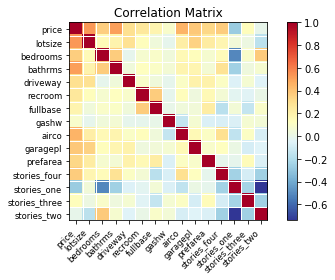

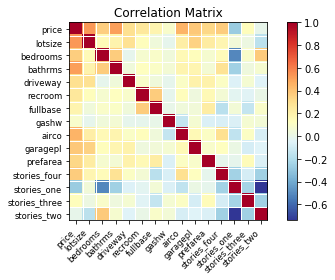

In [9]:
import statsmodels.api as sm 
sm.graphics.plot_corr(df.corr(), xnames=list(df.columns))

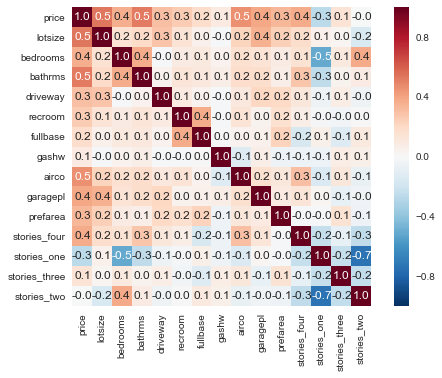

In [10]:
#Seaborn
import seaborn as sns
sns.heatmap(df.corr(), square = True, annot = True, fmt = '.1f')


In [11]:
#VIF (Variation Inflation Factor)
#remove highly correlated variables

#list of independent variables
independent_variables = ['lotsize', 'bedrooms', 'bathrms','driveway','recroom', 'fullbase','gashw','airco','garagepl',
                         'prefarea','stories_four','stories_one','stories_three','stories_two']
independent_variables

['lotsize',
 'bedrooms',
 'bathrms',
 'driveway',
 'recroom',
 'fullbase',
 'gashw',
 'airco',
 'garagepl',
 'prefarea',
 'stories_four',
 'stories_one',
 'stories_three',
 'stories_two']

In [12]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x=df[independent_variables]
x.head(3)

,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_four,stories_one,stories_three,stories_two
0,5850,3,1,1,0,1,0,0,1,0,0,0,0,1
1,4000,2,1,1,0,0,0,0,0,0,0,1,0,0
2,3060,3,1,1,0,0,0,0,0,0,0,1,0,0


In [13]:
y=df['price']
y.head(3)

0    42000.0
1    38500.0
2    49500.0
Name: price, dtype: float64

In [14]:
thresh = 10 
for i in np.arange ( 0, len(independent_variables)):
    vif =[variance_inflation_factor(x[independent_variables].values, ix)
          for ix in range (x[independent_variables].shape[1])]
    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print('vif : ', vif)
        print('dropping: ' + x[independent_variables].columns[maxloc]+ " at index : "+ str(maxloc))
        del independent_variables[maxloc]
    else: 
        break
print('Final Independent Variable',  independent_variables)

vif :  [1.3704738112004571, 1.5783268259718808, 1.2987779728705589, 1.1648811574651847, 1.214862009319293, 1.3369114662383517, 1.0530788697758049, 1.2195823546735252, 1.2188329290613049, 1.1812394341061749, 4.5448363398459719, 11.781465345739338, 3.9436985684475445, 17.220894903652624]
dropping: stories_two at index : 13
vif :  [9.0276724112408449, 12.40877864989557, 9.374682124313626, 6.79426994395169, 1.4753724454932144, 2.0557977126326841, 1.103128332756141, 1.7850543320175549, 1.9607784997238862, 1.5317205065647905, 1.4546157757803122, 1.8969940907498246, 1.2786005279235879]
dropping: bedrooms at index : 1
Final Independent Variable ['lotsize', 'bathrms', 'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea', 'stories_four', 'stories_one', 'stories_three']


In [15]:
#OLS ordinaru least squares
#Train/Test data - 80/20 or 70/30
from sklearn import preprocessing
from sklearn import metrics
from sklearn.cross_validation import train_test_split
x = df[independent_variables]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=.80, random_state=1)
x_train.shape

C:\Users\samee\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(436, 12)

In [16]:
y_train.shape

(436,)

In [17]:
x_test.shape

(110, 12)

In [18]:
y_test.shape

(110,)

In [19]:
a = sm.OLS(y_train,x_train).fit()
print(a.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     760.6
Date:                Sat, 13 Oct 2018   Prob (F-statistic):          5.22e-278
Time:                        12:11:51   Log-Likelihood:                -4819.9
No. Observations:                 436   AIC:                             9664.
Df Residuals:                     424   BIC:                             9713.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
lotsize           3.7699      0.388      9.708

In [20]:
#so any value in probablity which is greater than 0.02 remove it
#so we have to remove recrooms
independent_variables = ['lotsize','bathrms','driveway', 'fullbase','gashw','airco','garagepl',
                         'prefarea','stories_four','stories_one','stories_three']
from sklearn import preprocessing
from sklearn import metrics
from sklearn.cross_validation import train_test_split
x = df[independent_variables]
y = df['price']

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=.80, random_state=1)
x_train.shape

(436, 11)

In [21]:
y_train.shape

(436,)

In [22]:
x_test.shape

(110, 11)

In [23]:
y_test.shape

(110,)

In [24]:
a = sm.OLS(y_train,x_train).fit()
print(a.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     828.0
Date:                Sat, 13 Oct 2018   Prob (F-statistic):          4.34e-279
Time:                        12:11:51   Log-Likelihood:                -4820.8
No. Observations:                 436   AIC:                             9664.
Df Residuals:                     425   BIC:                             9708.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
lotsize           3.8087      0.388      9.826

In [33]:
#predict houseprice

lotsize = int(input("enter Lotsize :"))
bathrms = int(input("enter bathrooms :"))
driveway = int(input("enter driveways :"))
fullbase = int(input("enter full base :"))
gashw = int(input("enter gas hot water :"))
airco = int(input("enter air conditioned :"))
garagepl = int(input("enter  garage :"))
prefarea = int(input("enter preferred area :"))
storyone = int(input("enter story one :"))
storythree = int(input("enter story three :"))
storyfour = int(input("enter story four :"))

#convert these input in dictionary
dict1 = {'lotsize':lotsize, 'bathrms':bathrms, 'driveway':driveway, 'fullbase':fullbase, 'gashw':gashw,
         'airco':airco,'garagepl':garagepl, 'prefarea':prefarea}

enter Lotsize :4564
enter bathrooms :1
enter driveways :1
enter full base :0
enter gas hot water :1
enter air conditioned :1
enter  garage :0
enter preferred area :1
enter story one :1
enter story three :0
enter story four :0


In [34]:
dict1

{'airco': 1,
 'bathrms': 1,
 'driveway': 1,
 'fullbase': 0,
 'garagepl': 0,
 'gashw': 1,
 'lotsize': 4564,
 'prefarea': 1}

In [35]:
#create a dataframe from dictionary
df_input = pd.DataFrame(dict1,index=[0],columns=["lotsize","bathrms","driveway","fullbase","gashw",
                                                 "airco","garagepl","prefarea"])
df_input

,lotsize,bathrms,driveway,fullbase,gashw,airco,garagepl,prefarea
0,4564,1,1,0,1,1,0,1


In [36]:
df_input["stories_one"] = storyone
df_input["stories_three"] = storythree
df_input["stories_four"] = storyfour


In [37]:
#we used a in OLS
predictprice = a.predict(df_input)
print("predicted price of house is :", predictprice[0])

predicted price of house is : 99239.0601091
